# Importing Libraries

In [326]:
# Imports

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler

In [327]:
# Filtering warnings

import warnings
warnings.filterwarnings('ignore')

# Setting Seaborn Theme

sns.set_theme(context = 'paper', style = 'darkgrid')

# Load CSV File

In [329]:
# Loading the file that contains the sales data

sales_data = pd.read_csv('AusApparalSales4thQrt2020.csv')

# Checking Statistical Parameters

In [331]:
sales_data.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


In [332]:
sales_data.tail()

,Date,Time,State,Group,Unit,Sales
7555,30-Dec-2020,Afternoon,TAS,Seniors,14,35000
7556,30-Dec-2020,Evening,TAS,Kids,15,37500
7557,30-Dec-2020,Evening,TAS,Men,15,37500
7558,30-Dec-2020,Evening,TAS,Women,11,27500
7559,30-Dec-2020,Evening,TAS,Seniors,13,32500


In [333]:
# Viewing the types and null values of the data

sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


In [334]:
# Checking memory usage column wise

sales_data.memory_usage(deep = 1)

Index       132
Date     451332
Time     435960
State    397440
Group    413910
Unit      60480
Sales     60480
dtype: int64

In [335]:
# Converting "Date" column from "Object" to "datetime"

sales_data['Date'] = pd.to_datetime(sales_data['Date'])
print(sales_data.dtypes)

Date     datetime64[ns]
Time             object
State            object
Group            object
Unit              int64
Sales             int64
dtype: object


In [336]:
# Converting the "object" data types into "Category" for better memory utilization

for col in sales_data.select_dtypes(include='object').columns:
    sales_data[col] = sales_data[col].astype('category')

print(sales_data.dtypes)

Date     datetime64[ns]
Time           category
State          category
Group          category
Unit              int64
Sales             int64
dtype: object


In [337]:
# Checking optimized memory usage column wise

sales_data.memory_usage(deep = 1)

Index      132
Date     60480
Time      7841
State     8228
Group     7951
Unit     60480
Sales    60480
dtype: int64

In [338]:
# Checking shape of the data

sales_data.shape

(7560, 6)

In [339]:
# Checking for null values

sales_data.isna().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [340]:
# Checking for non-null values

sales_data.notna().sum()

Date     7560
Time     7560
State    7560
Group    7560
Unit     7560
Sales    7560
dtype: int64

### We can conclude from above that there are no missing data in the dataset. The total number of records is 7560. 

In [342]:
# Descriptive stats of the numeric data types

sales_data[['Unit', 'Sales']].describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


In [343]:
# Checking for duplicates

sales_data[sales_data.duplicated()].count()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [344]:
# Unique entries

print(sales_data['Time'].unique())
print(sales_data['State'].unique())
print(sales_data['Group'].unique())

[' Morning', ' Afternoon', ' Evening']
Categories (3, object): [' Afternoon', ' Evening', ' Morning']
[' WA', ' NT', ' SA', ' VIC', ' QLD', ' NSW', ' TAS']
Categories (7, object): [' NSW', ' NT', ' QLD', ' SA', ' TAS', ' VIC', ' WA']
[' Kids', ' Men', ' Women', ' Seniors']
Categories (4, object): [' Kids', ' Men', ' Seniors', ' Women']


In [345]:
# Creating a copy of the sales_data for further processing

sd = sales_data.copy(deep = 1)

In [346]:
# Changing the column names to lower case

sd.columns = sd.columns.str.lower()

# Basic Data Cleaning and Processing

## Checking for Outliers

### Outliers in the Unit column ->

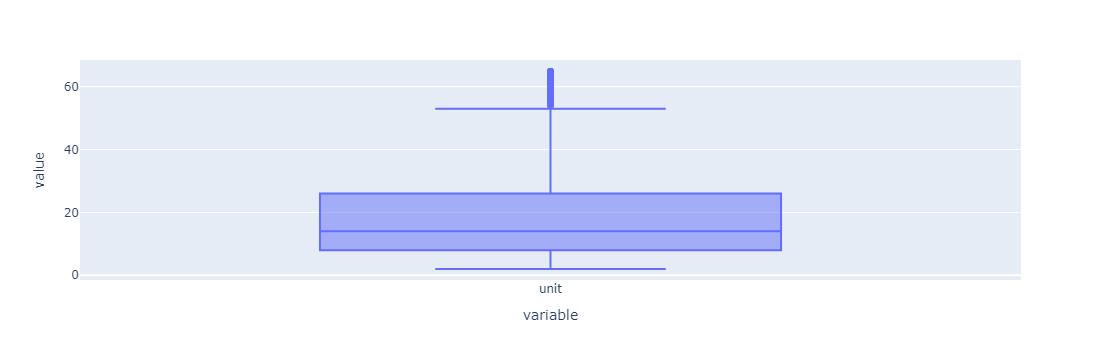

In [350]:
px.box(sd['unit'])

In [351]:
Q1 = sd['unit'].quantile(0.25)
Q3 = sd['unit'].quantile(0.75)
IQR = Q3 - Q1 # IQR is the interquartile range

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(lower_limit)
print(upper_limit)

-19.0
53.0


### We can observe from the box plot that the units 54 and above are the outliers in the plot.

In [353]:
sd.loc[sd['unit'] <= lower_limit] # outliers

,date,time,state,group,unit,sales


In [354]:
sd.loc[sd['unit'] >= upper_limit] # outliers

,date,time,state,group,unit,sales
5082,2020-12-01,Afternoon,VIC,Women,63,157500
5083,2020-12-01,Afternoon,VIC,Seniors,62,155000
5161,2020-12-02,Morning,VIC,Men,56,140000
5162,2020-12-02,Morning,VIC,Women,59,147500
5169,2020-12-02,Evening,VIC,Men,64,160000
...,...,...,...,...,...,...
7432,2020-12-29,Afternoon,VIC,Kids,65,162500
7433,2020-12-29,Afternoon,VIC,Men,54,135000
7437,2020-12-29,Evening,VIC,Men,54,135000
7515,2020-12-30,Morning,VIC,Seniors,65,162500


In [355]:
len(sd.loc[sd['unit'] >= upper_limit])

132

In [356]:
round(len(sd.loc[sd['unit'] >= upper_limit]) / sd.shape[0] * 100)

2

### 132 records will be deleted which is approximately 2% of the data.

In [358]:
md = sd.drop(sd.loc[sd['unit'] >= upper_limit].index)

In [359]:
md.shape

(7428, 6)

In [360]:
md.reset_index(drop = True, inplace=True)

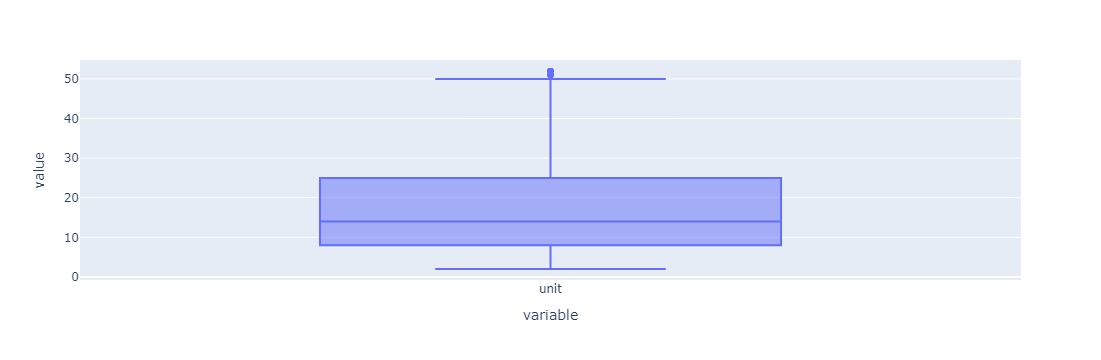

In [361]:
px.box(md['unit'])

### Outliers in the Sales column ->

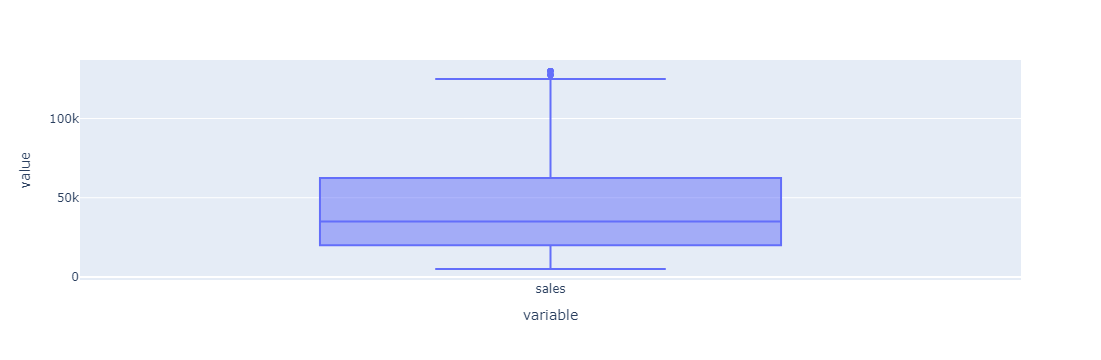

In [363]:
px.box(md['sales'])

In [364]:
Q1 = md['sales'].quantile(0.25)
Q3 = md['sales'].quantile(0.75)
IQR = Q3 - Q1 # IQR is the interquartile range

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(lower_limit)
print(upper_limit)

-43750.0
126250.0


### We can observe from the box plot that sales above 126.25k are the outliers in the plot.

In [366]:
md.loc[md['sales'] <= lower_limit]

,date,time,state,group,unit,sales


In [367]:
md.loc[md['sales'] >= upper_limit]

,date,time,state,group,unit,sales
5076,2020-12-01,Morning,VIC,Kids,51,127500
5083,2020-12-01,Evening,VIC,Men,52,130000
5319,2020-12-04,Afternoon,VIC,Women,52,130000
5321,2020-12-04,Evening,VIC,Men,52,130000
5322,2020-12-04,Evening,VIC,Women,52,130000
5562,2020-12-07,Afternoon,VIC,Women,51,127500
5874,2020-12-11,Morning,VIC,Seniors,51,127500
5878,2020-12-11,Evening,VIC,Kids,51,127500
6036,2020-12-13,Morning,VIC,Kids,51,127500
6353,2020-12-17,Morning,VIC,Women,52,130000


In [368]:
len(md.loc[md['sales'] >= upper_limit])

19

In [369]:
round(len(md.loc[md['sales'] >= upper_limit]) / md.shape[0] * 100)

0

### Only 19 records will be deleted which is negligible as compared to the data available.

In [371]:
md = md.loc[md['sales'] <= upper_limit]

In [372]:
md.shape

(7409, 6)

In [373]:
md.reset_index(drop = True, inplace=True)

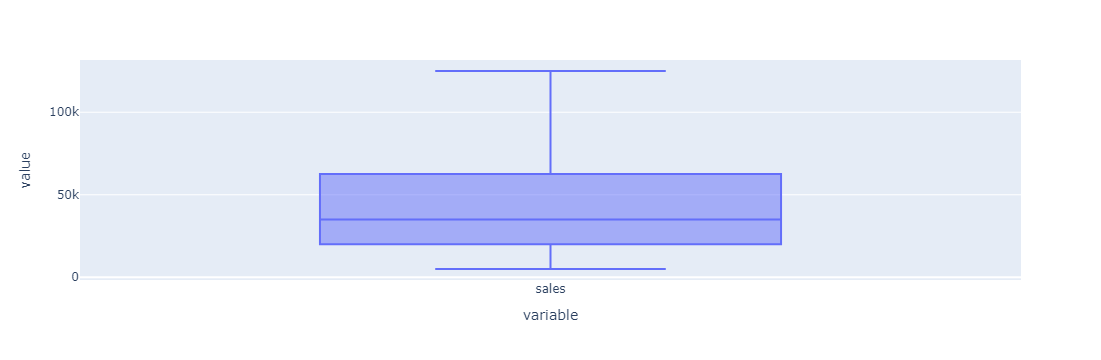

In [374]:
px.box(md['sales'])

### md is the dataframe after removing outliers from unit and sales columns.

In [376]:
pd.DataFrame([sd.groupby('group').count()['sales'], md.groupby('group').count()['sales']], index = ['before', 'after'])

group,Kids,Men,Seniors,Women
before,1890,1890,1890,1890
after,1856,1850,1851,1852


### We can see from the above data that all the four groups kids, men, seniors and women lost 34, 40, 39 & 38 values respectively.

# Normalization

In [379]:
# Initialize the MinMaxScaler

scaler = MinMaxScaler()

# Fit and Transform the Unit column and add it to the dataframe

sd['normalized_unit'] = scaler.fit_transform(sd[['unit']])

# Fit and Transform the Sales column and add it to the dataframe

sd['normalized_sales'] = scaler.fit_transform(sd[['sales']])

sd[['unit', 'sales', 'normalized_unit', 'normalized_sales']].describe()

,unit,sales,normalized_unit,normalized_sales
count,7560.000000,7560.000000,7560.000000,7560.000000
mean,18.005423,45013.558201,0.254054,0.254054
std,12.901403,32253.506944,0.204784,0.204784
min,2.000000,5000.000000,0.000000,0.000000
25%,8.000000,20000.000000,0.095238,0.095238
50%,14.000000,35000.000000,0.190476,0.190476
75%,26.000000,65000.000000,0.380952,0.380952
max,65.000000,162500.000000,1.000000,1.000000


# Visualization

In [381]:
# Extracting Minimum of the Sales

sd.set_index('sales').sort_index().head(1)

,date,time,state,group,unit,normalized_unit,normalized_sales
sales,,,,,,,
5000,2020-11-26,Morning,WA,Women,2,0.0,0.0


In [382]:
# Extracting Maximum of the Sales

sd.set_index('sales').sort_index().tail(1)

,date,time,state,group,unit,normalized_unit,normalized_sales
sales,,,,,,,
162500,2020-12-24,Evening,VIC,Seniors,65,1.0,1.0


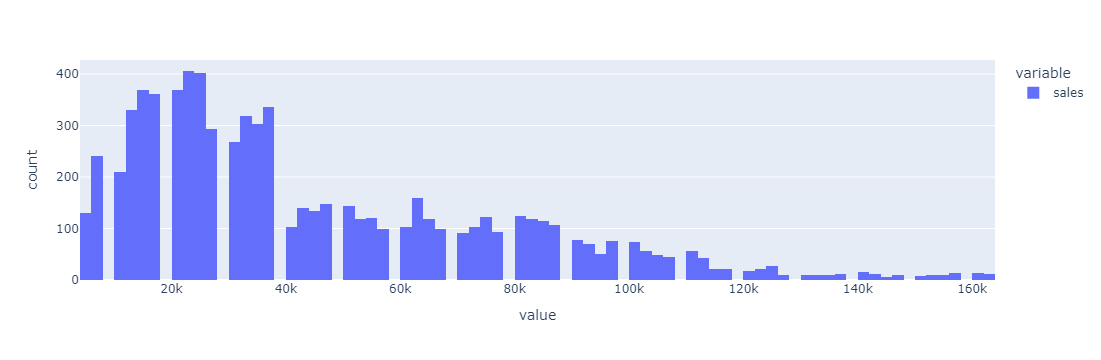

In [383]:
# Using Plotly Histogram for more data and interaction

sales_hist = px.histogram(sd['sales'])
sales_hist

### From the above graph, we can see that the highest sales value is of 162.5k which occurred 11 times. The lowest sales value is of 5k which occurred 130 times. The sales value of 22.5k has occurred 406 times which is highest by count.

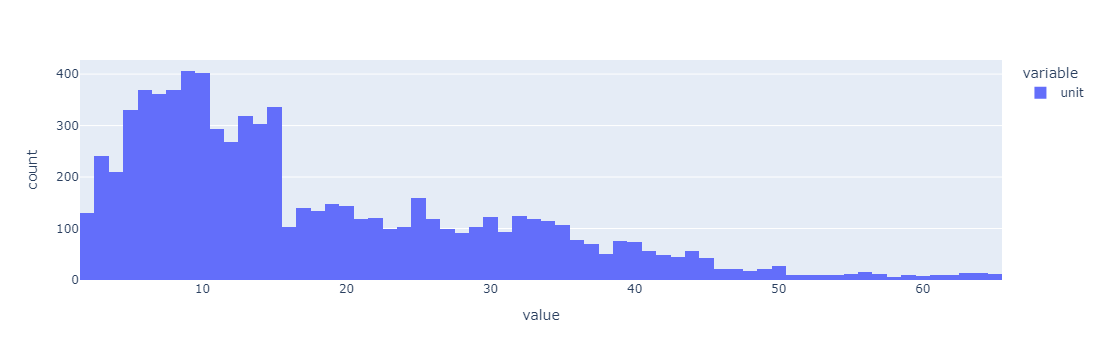

In [385]:
# Using Plotly Histogram for more data and interaction

unit_hist = px.histogram(sd['unit'])
unit_hist

### From the above graph, we can see that the highest unit value is of 65 which occurred 11 times. The lowest unit value is of 2 which occurred 130 times. The unit value of 9 has occurred 406 times which is highest by count.

### We can also see that the frequency of the data in sales and unit are same.

In [388]:
print('Per unit price = {:.2f}'.format(22500/9))

Per unit price = 2500.00


<Axes: title={'center': 'Sales by States Graph - 1'}, xlabel='state', ylabel='sales'>

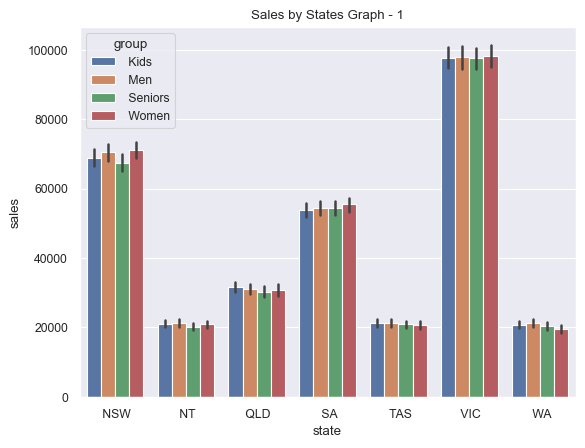

In [389]:
# Using Seaborn graph to show sales in different states

state_sales = sns.barplot(data = sd, x = 'state', y = 'sales', hue = 'group')
plt.title('Sales by States Graph - 1')
state_sales

<Axes: title={'center': 'Sales by States Graph - 2'}, xlabel='group', ylabel='sales'>

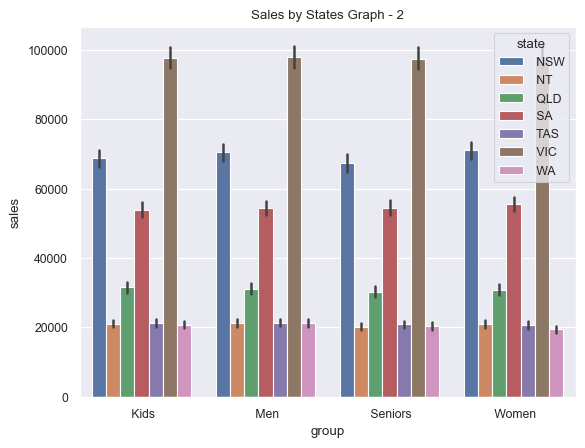

In [390]:
# Using Seaborn graph to show sales in different states

state_sales = sns.barplot(data = sd, x = 'group', y = 'sales', hue = 'state')
plt.title('Sales by States Graph - 2')
state_sales

### From the above graphs we can infer that the sales is highest in the VIC state followed by NSW and SA. The highest sales in VIC was from Women. Whilst women purchased the least in WA. The lowest sales states are WA, NT and TAS.

<Axes: title={'center': 'Sales by Time Graph'}, xlabel='time', ylabel='sales'>

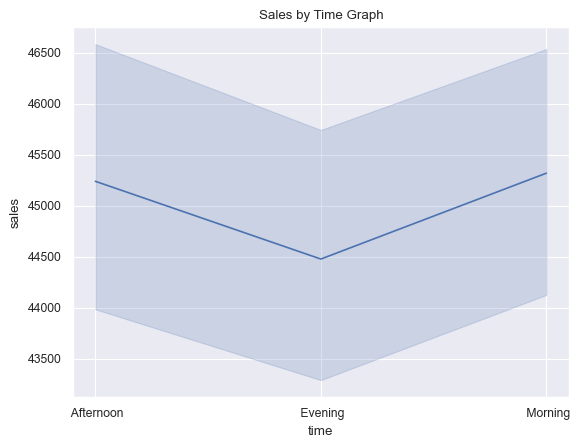

In [392]:
# Using Seaborn graph to show sales in different time

time_sales = sns.lineplot(data = sd, x = 'time', y = 'sales')
plt.title('Sales by Time Graph')
time_sales

### From the above graph we can observe that sales is maximum during Morning period, and reduces slightly as the day progresses i.e. during Afternoon period. Sales drop considerably as it approaches Evening time.

<Axes: title={'center': 'Sales by Group Graph'}, xlabel='group', ylabel='sales'>

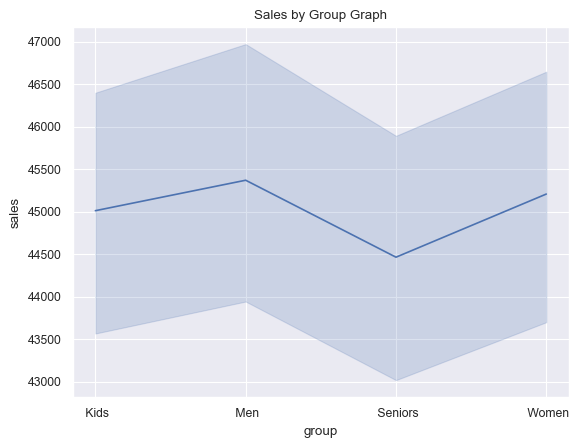

In [394]:
# Using Seaborn graph to show sales in different group

group_sales = sns.lineplot(data = sd, x = 'group', y = 'sales')
plt.title('Sales by Group Graph')
group_sales

### From the above graph it can be observed that in aggregate terms, sales is maximum for Men; closely followed by Women and Kids. Sales for Seniors is the least.

# Generate Daily, Weekly, Monthly and Quarterly reports

In [397]:
sales_report = pd.read_csv('AusApparalSales4thQrt2020.csv', parse_dates = ["Date"], index_col = "Date")

In [398]:
sales_report.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7560 entries, 2020-10-01 to 2020-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Time    7560 non-null   object
 1   State   7560 non-null   object
 2   Group   7560 non-null   object
 3   Unit    7560 non-null   int64 
 4   Sales   7560 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 354.4+ KB


In [399]:
sales_report.head()

,Time,State,Group,Unit,Sales
Date,,,,,
2020-10-01,Morning,WA,Kids,8,20000
2020-10-01,Morning,WA,Men,8,20000
2020-10-01,Morning,WA,Women,4,10000
2020-10-01,Morning,WA,Seniors,15,37500
2020-10-01,Afternoon,WA,Kids,3,7500


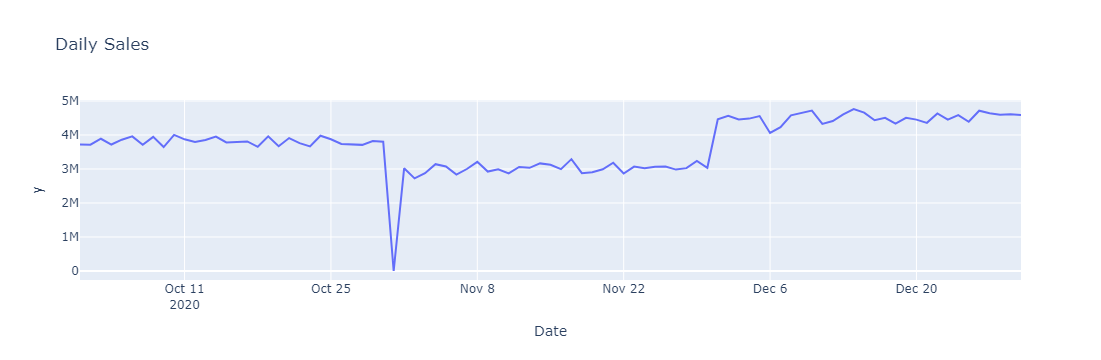

In [400]:
# Daily Report: resample by Day

daily_report = sales_report.resample('D').sum()
daily_sales = px.line(data_frame = sales_report.resample('D').sum(), y = daily_report['Sales'], title = 'Daily Sales')
daily_sales

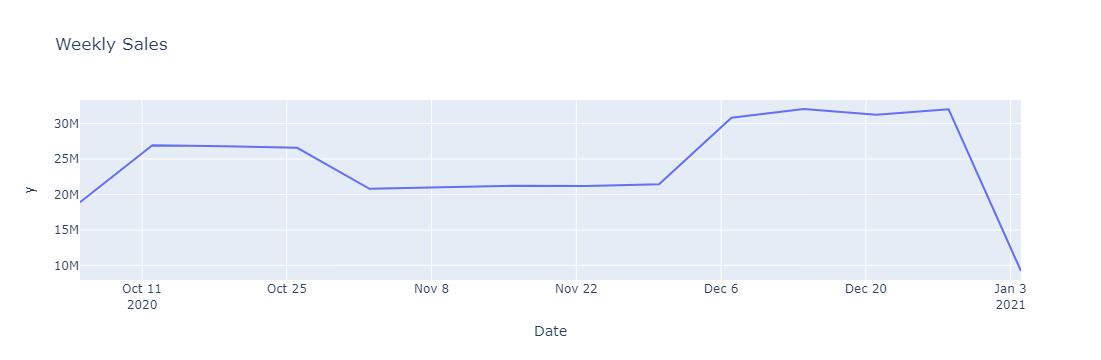

In [401]:
# Weekly Report: resample by Week and start with Monday

weekly_report = sales_report.resample('W-MON').sum()
weekly_sales = px.line(data_frame = sales_report.resample('W-MON').sum(), y = weekly_report['Sales'], title = 'Weekly Sales')
weekly_sales

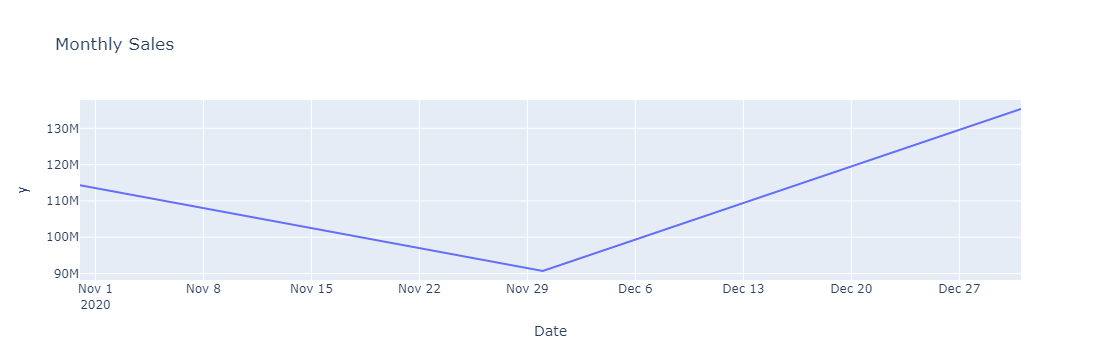

In [402]:
# Monthly Report: resample by Month

monthly_report = sales_report.resample('M').sum()
monthly_sales = px.line(data_frame = sales_report.resample('M').sum(), y = monthly_report['Sales'], title = 'Monthly Sales')
monthly_sales

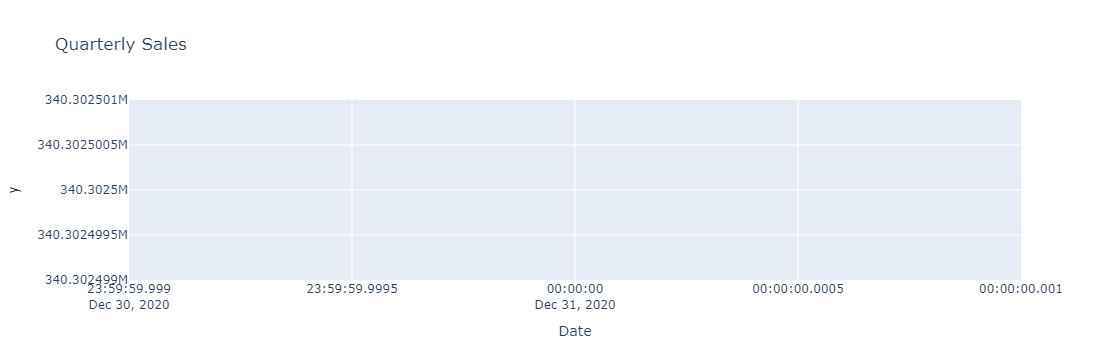

In [403]:
# Quarterly Report: resample by Quarter

quarterly_report = sales_report.resample('Q').sum()
quarterly_sales = px.line(data_frame = sales_report.resample('Q').sum(), y = quarterly_report['Sales'], title = 'Quarterly Sales')
quarterly_sales

### From the graphs of daily, weekly and monthly sales we can see that November had the lowest sales while December had the highest sales. For Quarterly graph we have only one bar as the dataset contains data from only one quarter.

# Dashboard

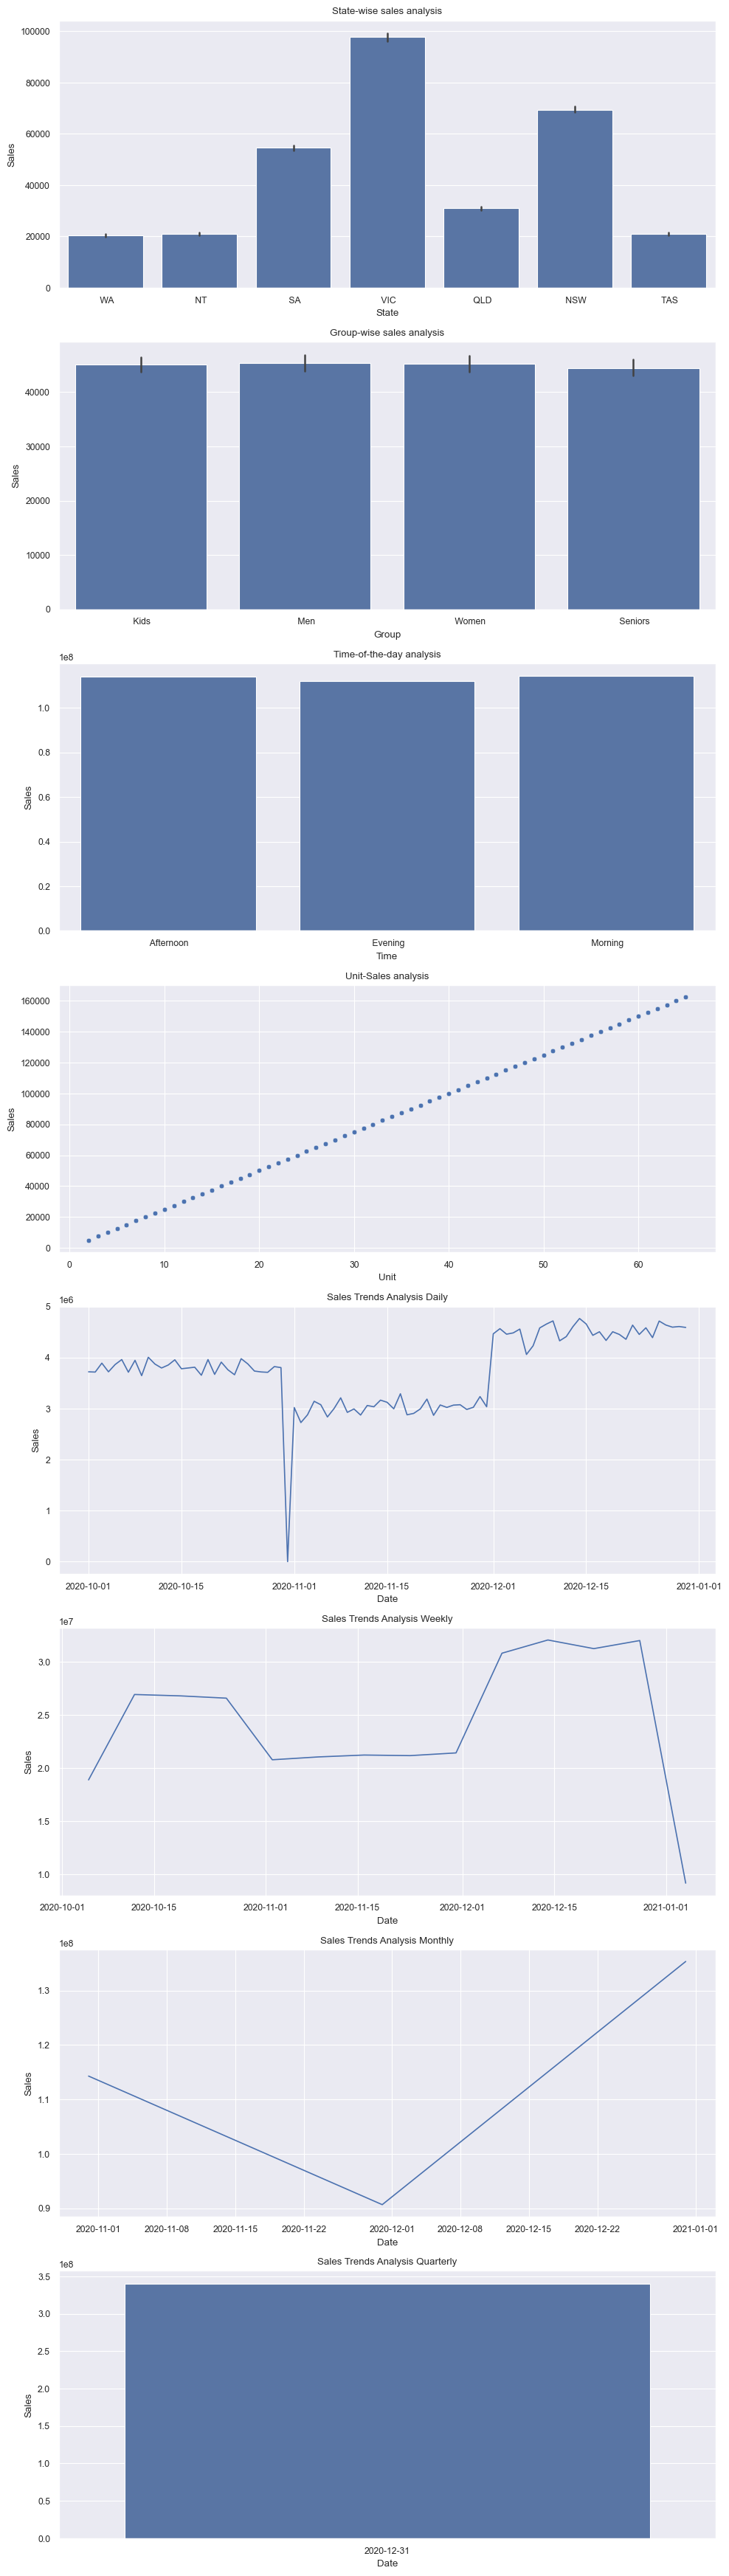

In [406]:
# Creating the dashboard

plt.figure(figsize=(10,35))

# State-wise sales analysis for different groups

plt.subplot(811)
sns.barplot(data = sales_report, x = 'State', y = 'Sales').set(title = "State-wise sales analysis")

# Group-wise sales analysis across different states

plt.subplot(812)
sns.barplot(data = sales_report, x = 'Group', y = 'Sales').set(title = "Group-wise sales analysis")

# Time-of-the-day analysis

df_time_analysis = sales_report.groupby('Time').sum().reset_index() # Aggregating data for time analysis
plt.subplot(813)
sns.barplot(data = df_time_analysis, x = 'Time', y = 'Sales').set(title = "Time-of-the-day analysis")

# Unit-wise sales analysis

plt.subplot(814)
sns.scatterplot(data = sales_report, x = 'Unit', y = 'Sales').set(title = "Unit-Sales analysis")

# Sales trends

plt.subplot(815)
sns.lineplot(data = daily_report, x = daily_report.index, y = 'Sales').set(title = "Sales Trends Analysis Daily")

plt.subplot(816)
sns.lineplot(data = weekly_report, x = weekly_report.index, y = 'Sales').set(title = "Sales Trends Analysis Weekly")

plt.subplot(817)
sns.lineplot(data = monthly_report, x = monthly_report.index, y = 'Sales').set(title = "Sales Trends Analysis Monthly")

plt.subplot(818)
sns.barplot(data = quarterly_report, x = quarterly_report.index, y = 'Sales').set(title = "Sales Trends Analysis Quarterly")

plt.tight_layout()